<a href="https://colab.research.google.com/github/alirezasakhaei/RL_Course2023_Homeworks/blob/main/HW01/5_Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE-40957: Reinforcement Learning
## HW1

*Full name:* Alireza Sakhaeirad

*Student number:* 98101714

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [1]:
!pip install gym[toy_text]
import gym
import numpy as np
from tqdm import trange 
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()

In [7]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

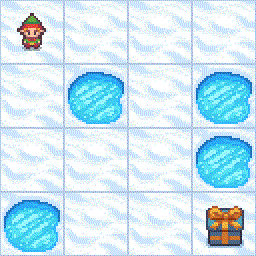


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [8]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



In [9]:
Actions =  {0: 'LEFT', 
            1: 'DOWN',
            2: 'RIGHT',
            3: 'UP'}

In [ ]:
# Be free to test!
# take random actions, and see how the agent moves
import time
env.reset()

action_seq= []

for i in range(3):
  action_number = env.action_space.sample()
  print(action_number)
  action_seq.append(Actions[action_number])
  env.step(action_number)

  clear_output()
  print(' --> '.join(action_seq))
  env_screen = env.render(mode = 'rgb_array')
  plt.imshow(env_screen)
  plt.axis('off')
  plt.show()
  time.sleep(1)

## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [11]:
def take_action(env, state, epsilon, Q):
    rand = np.random.uniform(0, 1)
    if rand < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, alpha, gamma):
    # Initialize the action-value function Q(s,a)
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    epsilon = 0.1
    # Loop over each episode
    for episode in tqdm(range(num_episodes)):

        state = env.reset()
        # ==================================== Your Code (Begin) ====================================
        done = 0
        while not done:
            action = take_action(env, state, epsilon, Q)
            next_state, reward, done, info = env.step(action)

            prev_val = Q[state, action]
            next_max = np.max(Q[next_state])
            Q[state, action] = prev_val + alpha * (reward + gamma * next_max - prev_val)
            state = next_state
        # ==================================== Your Code (End) ====================================
            
    # Return the learned action-value function
    return Q

In [5]:
# change the parameters if needed
num_episodes = 200000
alpha = 0.01
gamma = 0.95

In [12]:
Q = q_learning(env, num_episodes, alpha, gamma)

100%|██████████| 200000/200000 [04:19<00:00, 769.31it/s]


In [22]:
TESTS = 1000
SC_Q = 0
Ep_len_avg_Q = 0

for i in range(TESTS):
    ep_len = 0
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        ep_len += 1
        state = new_state
        if done:
            if reward == 1:
                SC_Q += 1

    Ep_len_avg_Q = Ep_len_avg_Q + (1/(i+1))*(ep_len - Ep_len_avg_Q)
print(f'Success Rate is {round(SC_Q / TESTS, 2)}')

Success Rate is 0.73


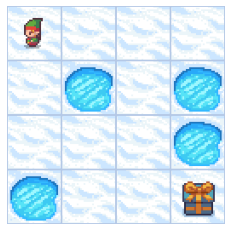

----------------------



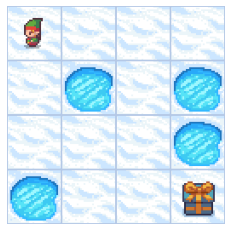

----------------------



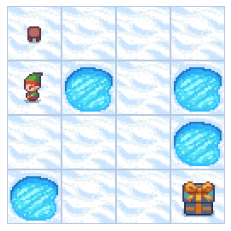

----------------------



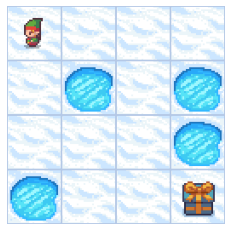

----------------------



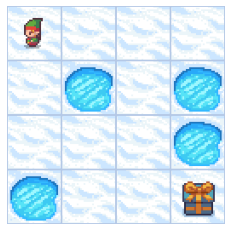

----------------------



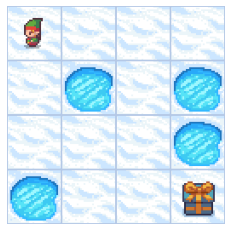

----------------------



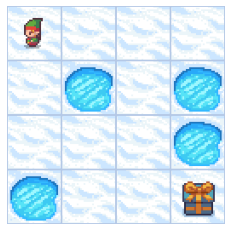

----------------------



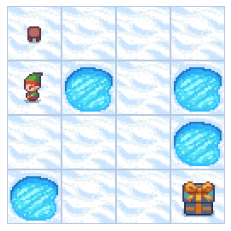

----------------------



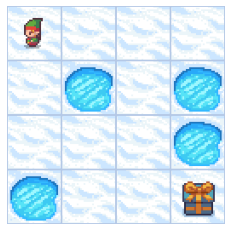

----------------------



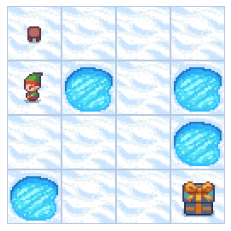

----------------------



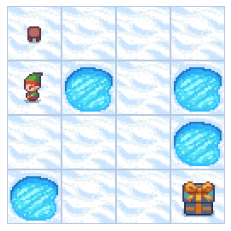

----------------------



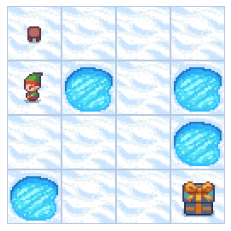

----------------------



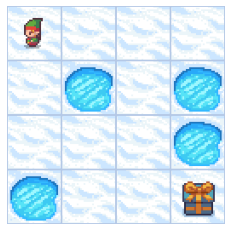

----------------------



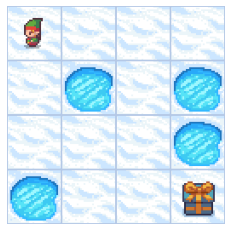

----------------------



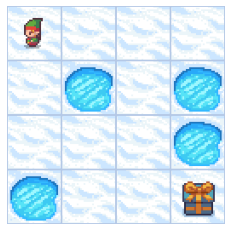

----------------------



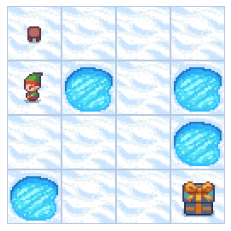

----------------------



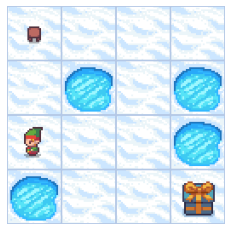

----------------------



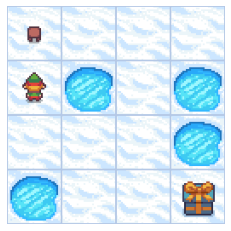

----------------------



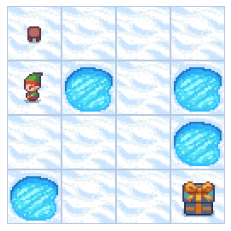

----------------------



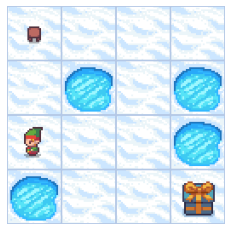

----------------------



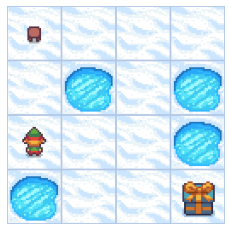

----------------------



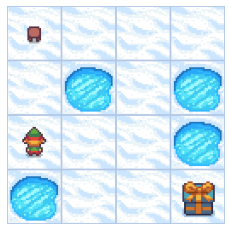

----------------------



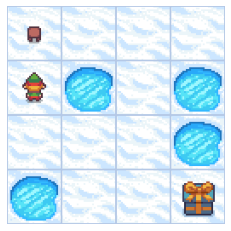

----------------------



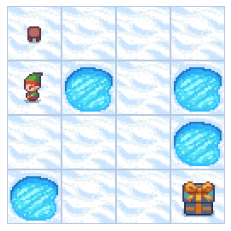

----------------------



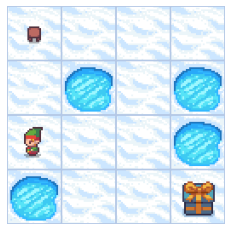

----------------------



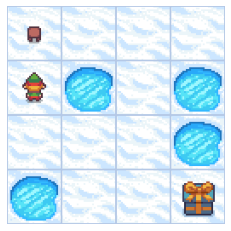

----------------------



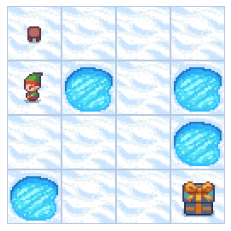

----------------------



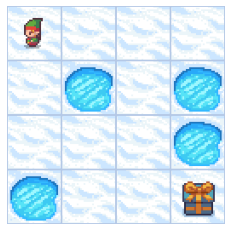

----------------------



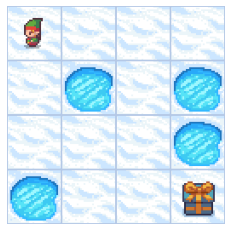

----------------------



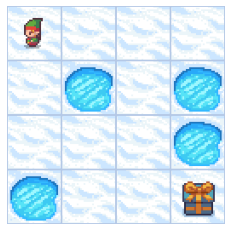

----------------------



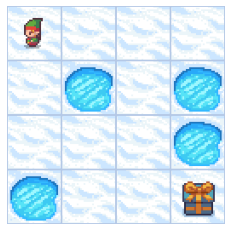

----------------------



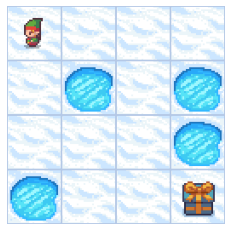

----------------------



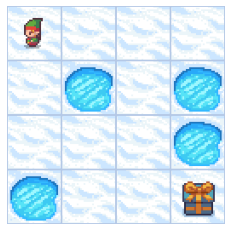

----------------------



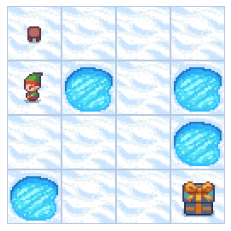

----------------------



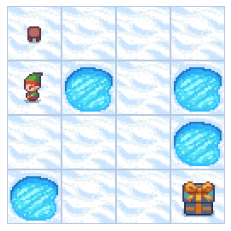

----------------------



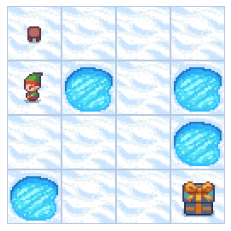

----------------------



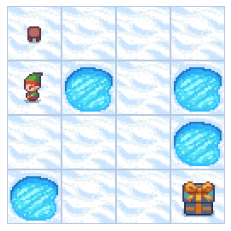

----------------------



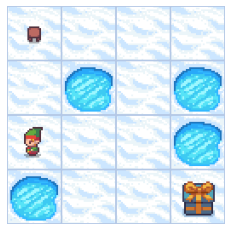

----------------------



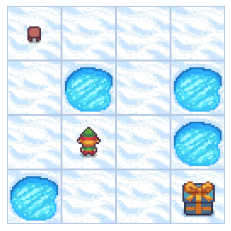

----------------------



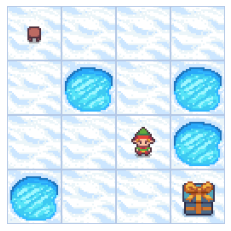

----------------------



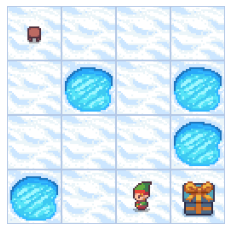

----------------------



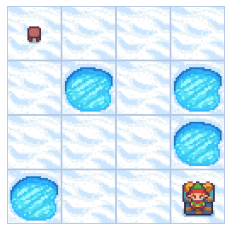

----------------------
Successful Trial


In [14]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.

state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    new_state, reward, done, _ = env.step(action)
    state = new_state

    env_screen = env.render(mode = 'rgb_array')
    plt.imshow(env_screen)
    plt.axis('off')
    plt.show()

    print('----------------------')

if done:
    if reward == 1:
        print('Successful Trial')
    else:
        print('Failed Trial')


## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [15]:
def take_action(env, state, epsilon, Q):
    rand = np.random.uniform(0, 1)
    if rand < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    for episode in tqdm(range(num_episodes)):
        state = env.reset()
        # ==================================== Your Code (Begin) ====================================
        done = 0
        action = take_action(env, state, epsilon, Q) # this line is the key diff
        while not done:

            # taking the step and choosing the next action
            next_state, reward, done, info = env.step(action)
            next_action = take_action(env, next_state, epsilon, Q)

            # updating Q
            old = Q[state, action]
            new = old + alpha*(reward + gamma * Q[next_state, next_action] - old)
            Q[state, action] = new

            # passing stuff to the next loop
            state = next_state
            action = next_action
        # ==================================== Your Code (End) ====================================
        
    return Q

In [16]:
# change the parameters if needed
n_episodes = 200000
alpha = 0.01
gamma = 0.95
epsilon =0.1

In [17]:
Q_SARSA = sarsa(env, n_episodes, alpha, gamma, epsilon)

100%|██████████| 200000/200000 [03:40<00:00, 908.11it/s] 


In [23]:
TESTS = 1000
SC_SARSA = 0
Ep_len_avg_SARSA = 0

for i in range(TESTS):
    ep_len = 0
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(Q_SARSA[state, :])
        new_state, reward, done, _ = env.step(action)
        ep_len += 1
        state = new_state
        if done:
            if reward == 1:
                SC_SARSA += 1
                
    Ep_len_avg_SARSA = Ep_len_avg_SARSA + (1/(i+1))*(ep_len - Ep_len_avg_SARSA)
print(f'Success Rate is {round(SC_SARSA / TESTS, 2)}')

Success Rate is 0.72


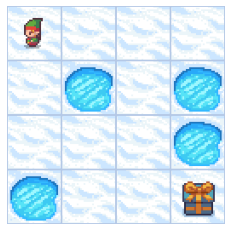

----------------------


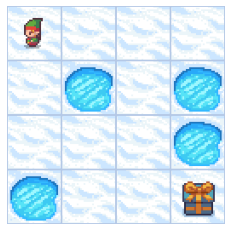

----------------------


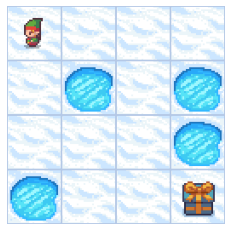

----------------------


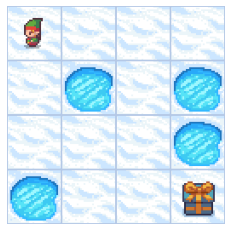

----------------------


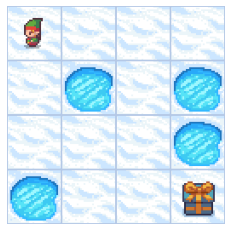

----------------------


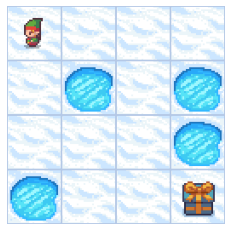

----------------------


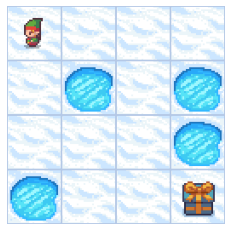

----------------------


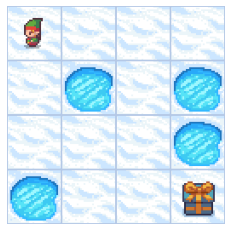

----------------------


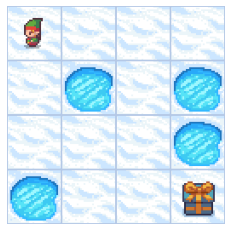

----------------------


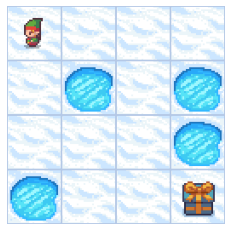

----------------------


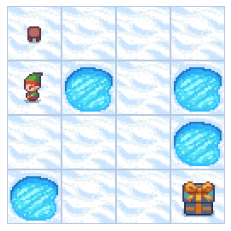

----------------------


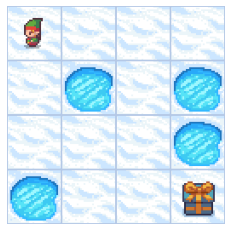

----------------------


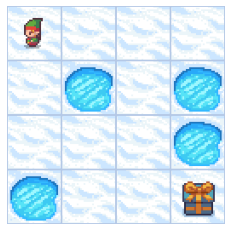

----------------------


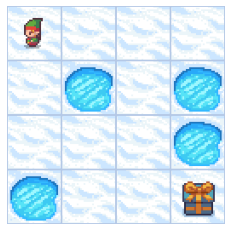

----------------------


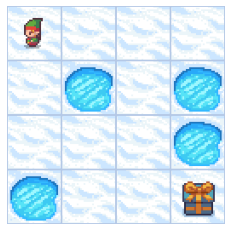

----------------------


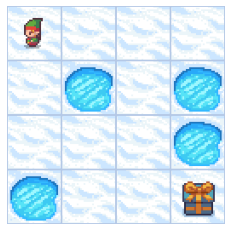

----------------------


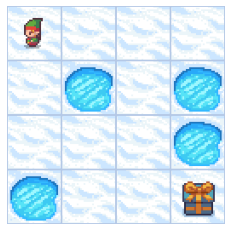

----------------------


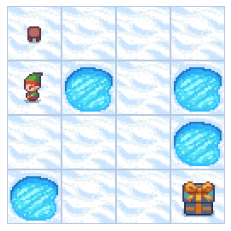

----------------------


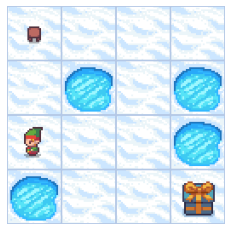

----------------------


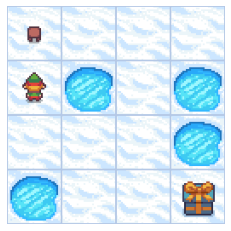

----------------------


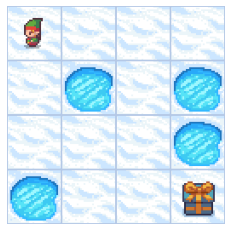

----------------------


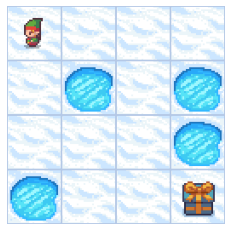

----------------------


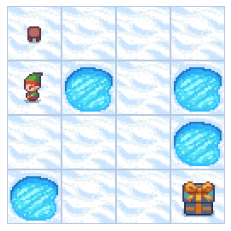

----------------------


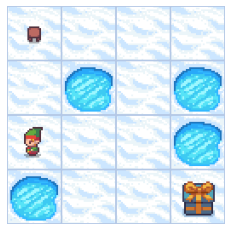

----------------------


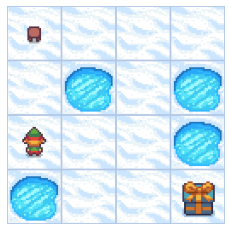

----------------------


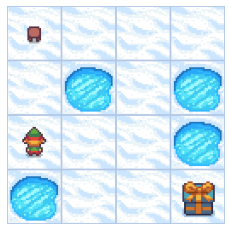

----------------------


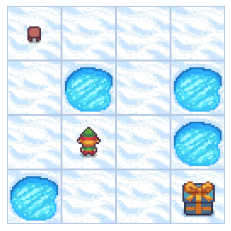

----------------------


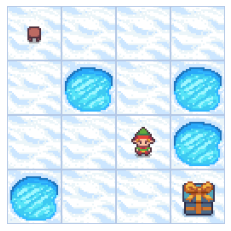

----------------------


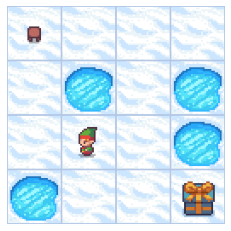

----------------------


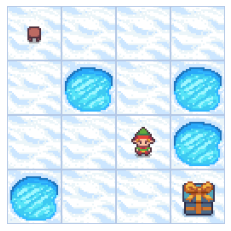

----------------------


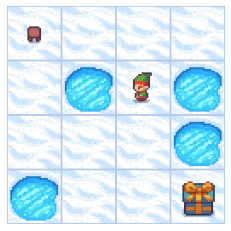

----------------------


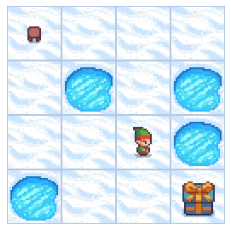

----------------------


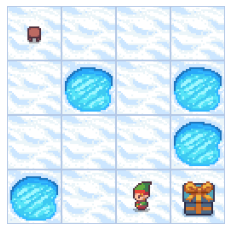

----------------------


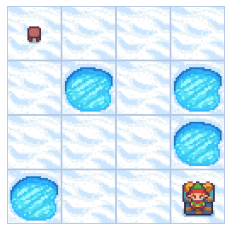

----------------------
Successful Trial


In [30]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.

state = env.reset()
done = False
while not done:
    action = np.argmax(Q_SARSA[state, :])
    new_state, reward, done, _ = env.step(action)
    state = new_state

    env_screen = env.render(mode = 'rgb_array')
    plt.imshow(env_screen)
    plt.axis('off')
    plt.show()

    print('----------------------')

if done:
    if reward == 1:
        print('Successful Trial')
    else:
        print('Failed Trial')


## Conclution
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

<br><br><br><br><br><br><br><br><br><br><br>

# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

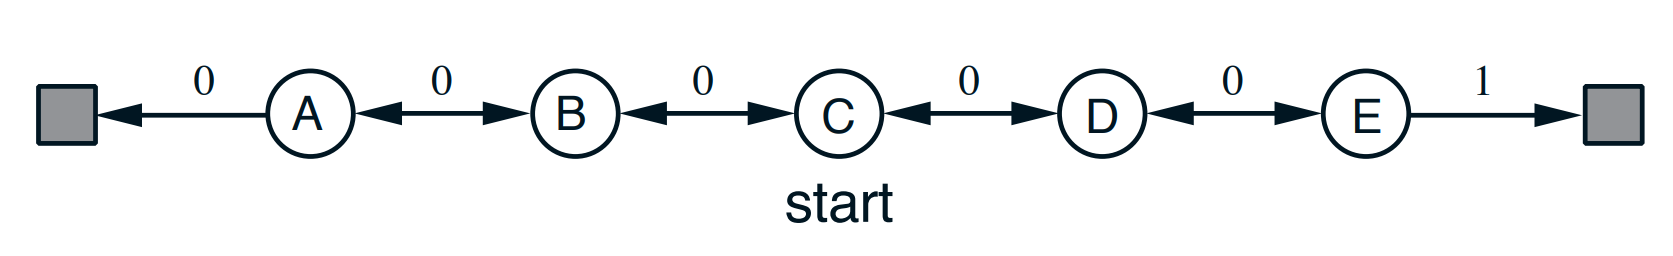

In [ ]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):

        if self.state == self.end or self.state == 0:
            return self.state, 0, True

        if action == 1:
            action = 'RIGHT'
        elif action == 0:
            action = 'LEFT'
            
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        values = [0] * self.num_states
  
        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]
        
        return values

The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [ ]:
def take_action(env, state, epsilon, Q):
    rand = np.random.uniform(0, 1)
    if rand < epsilon:
        action = int(np.floor(np.random.uniform(0, 2)))
    else:
        if Q[state, 0] == Q[state, 1]:
            action = int(np.floor(np.random.uniform(0, 2)))
        else:
            action = np.argmax(Q[state, :])
    return action

def MC(env, num_episodes, alpha=0.1):
    
    epsilon = 0.1
    Q = np.zeros((env.num_states, len(env.actions)))
    # ==================================== Your Code (Begin) ====================================
    for j in tqdm(range(num_episodes)):
        states = []
        actions = []
        state, _, __ = env.reset()
        done = 0

        # episode simulation
        while not done:
            
            action = take_action(env, state, epsilon, Q)
            states.append(state)
            actions.append(action)
            state, reward, done = env.step(action)

        # update process
        T = len(states)
        G = reward
        for i in range(T-1, -1, -1):
            state = states[i]
            action = actions[i]
            G = G * env.gamma

            old_val = Q[state, action]
            new_val = old_val + alpha * (G - old_val)
            Q[state, action] = new_val


    # ==================================== Your Code (End) ====================================
    # return values, errors
    return Q

In [ ]:
env2 = RandomWalkEnv()
# change the parameters if needed
n_episodes = 100000
alpha = 0.1
Q_MC = MC(env2, n_episodes, alpha)

100%|██████████| 100000/100000 [03:11<00:00, 523.50it/s]


In [ ]:
Q_MC

array([[0.        , 0.        ],
       [0.        , 0.21424858],
       [0.19246244, 0.09      ],
       [0.081     , 0.05536663],
       [0.04982995, 0.13851   ],
       [0.124659  , 0.1       ],
       [0.09      , 0.58730772],
       [0.52773831, 0.06461082],
       [0.05814974, 0.07976644],
       [0.0717898 , 0.05814974],
       [0.05233476, 0.06461082],
       [0.05814974, 0.07976644],
       [0.0717898 , 0.86104102],
       [0.85825974, 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.99873647, 1.        ],
       [0.99956546, 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.

In [ ]:
# Visualization

import matplotlib.pyplot as plt

env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
    rmse_avg = np.zeros(num_episodes)
    for run in range(num_runs):
        values, errors = MC(env, num_episodes, alpha)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs
    plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# Any visualization for better intuition would be appreciated.